In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_movies=pd.read_csv(r"C:\Users\Vijay Machina\Documents\Python\Project\MovieLens Case Study\Data science with Python 1\movies.dat",sep='::'
                      ,encoding='ISO-8859-1',header=None,engine='python',names=['MovieID','Title','Genres'])
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings=pd.read_csv(r"C:\Users\Vijay Machina\Documents\Python\Project\MovieLens Case Study\Data science with Python 1\ratings.dat",sep='::',header=None
                ,encoding='ISO-8859-1',engine='python',names=['UserID', 'MovieID', 'rating', 'timestamp'])
df_ratings.head()

,UserID,MovieID,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
df_users=pd.read_csv(r"C:\Users\Vijay Machina\Documents\Python\Project\MovieLens Case Study\Data science with Python 1\users.dat",sep='::',header=None
                ,encoding='ISO-8859-1',engine='python',names=['UserID','Gender','Age','Occupation','Zip-code'])
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
df1=pd.merge(df_movies,df_ratings,on='MovieID')
df1.head()

,MovieID,Title,Genres,UserID,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [7]:
df2=pd.merge(df_users,df_ratings,on='UserID')
df2.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,rating,timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [8]:
df3=pd.merge(df1,df2)
df3.head()

,MovieID,Title,Genres,UserID,rating,timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [9]:
df3.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'rating', 'timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [10]:
master_data=df3[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'rating', 'Genres']]
master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,rating,Genres
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy
1,1,Toy Story (1995),6,50,F,9,4,Animation|Children's|Comedy
2,1,Toy Story (1995),8,25,M,12,4,Animation|Children's|Comedy
3,1,Toy Story (1995),9,25,M,17,5,Animation|Children's|Comedy
4,1,Toy Story (1995),10,35,F,1,5,Animation|Children's|Comedy


In [11]:
master_data.shape

(1000209, 8)

Text(0.5, 1.0, 'Age Distribution')

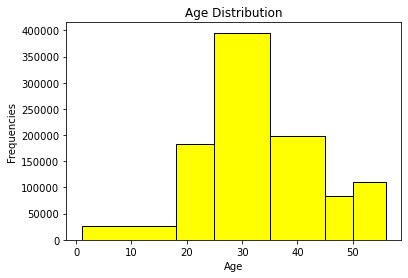

In [13]:
plt.hist(master_data.Age,bins=[1,18,25,35,45,50,56],color='yellow',edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.title("Age Distribution")
plt.show()

## We conclude that from above histogram the maximum number of users ratings are within Age range from 25-35 years


In [19]:
rating_toystory= master_data[master_data['Title']=="Toy Story (1995)"]
rating_toystory['rating'].mean()


4.146846413095811

## Average Rating of movie Toy Story is 4.15

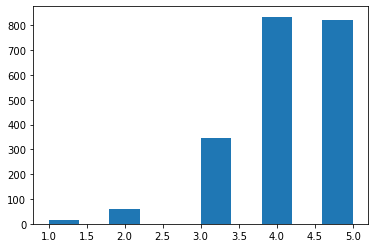

In [18]:
plt.hist(master_data[master_data['Title']=="Toy Story (1995)"].rating)
plt.show()

In [17]:
##Top 25 movies by viewership rating

most_rating=master_data.groupby('Title').size().sort_values(ascending=False)
most_rating[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [16]:
##Top 25 movies Rated 5

Rated_5=master_data[master_data['rating']==5].groupby('Title').size().sort_values(ascending=False)
Rated_5[:25]

Title
American Beauty (1999)                                   1963
Star Wars: Episode IV - A New Hope (1977)                1826
Raiders of the Lost Ark (1981)                           1500
Star Wars: Episode V - The Empire Strikes Back (1980)    1483
Godfather, The (1972)                                    1475
Schindler's List (1993)                                  1475
Shawshank Redemption, The (1994)                         1457
Matrix, The (1999)                                       1430
Saving Private Ryan (1998)                               1405
Sixth Sense, The (1999)                                  1385
Silence of the Lambs, The (1991)                         1350
Fargo (1996)                                             1278
Braveheart (1995)                                        1206
Pulp Fiction (1994)                                      1193
Princess Bride, The (1987)                               1186
Usual Suspects, The (1995)                               1144
St

In [15]:
##Average rating of Top 25 movies

mean_rating=master_data.groupby('Title').rating.mean()
mean_rating.sort_values(ascending=False)[:25]

Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [ ]:
master_data[master_data['UserID']==2696]

In [21]:
master_data['Genres_New']=master_data['Genres'].str.split("|")
master_data.head()

C:\Users\Vijay Machina\AppData\Local\Temp\ipykernel_20160\3550501920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['Genres_New']=master_data['Genres'].str.split("|")


,MovieID,Title,UserID,Age,Gender,Occupation,rating,Genres,Genres_New
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,1,Toy Story (1995),6,50,F,9,4,Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
2,1,Toy Story (1995),8,25,M,12,4,Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
3,1,Toy Story (1995),9,25,M,17,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
4,1,Toy Story (1995),10,35,F,1,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]"


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

encoded = pd.DataFrame(mlb.fit_transform(master_data['Genres_New']), columns=mlb.classes_, index=master_data.index)
encoded

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000206,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [23]:
master_data_encoding=pd.concat([master_data,encoded],axis=1)
master_data_encoding.head()

,MovieID,Title,UserID,Age,Gender,Occupation,rating,Genres,Genres_New,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6,50,F,9,4,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,25,M,12,4,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),9,25,M,17,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),10,35,F,1,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0,...,0,0,0,0,0,0,0,0,0,0


In [24]:

gen=pd.get_dummies(master_data.Gender)

gen

,F,M
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
1000204,1,0
1000205,0,1
1000206,0,1
1000207,0,1


In [25]:
master_data.drop(columns='Gender',inplace=True)
master_data=pd.concat([master_data,gen],axis=1)

C:\Users\Vijay Machina\AppData\Local\Temp\ipykernel_20160\4083581064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data.drop(columns='Gender',inplace=True)


In [26]:
master_data.rename(columns={'F':'Gender'},inplace=True)

In [27]:
master_data.drop(columns='M',inplace=True)


In [28]:
master_data.head()

,MovieID,Title,UserID,Age,Occupation,rating,Genres,Genres_New,Gender
0,1,Toy Story (1995),1,1,10,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",1
1,1,Toy Story (1995),6,50,9,4,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",1
2,1,Toy Story (1995),8,25,12,4,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0
3,1,Toy Story (1995),9,25,17,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",0
4,1,Toy Story (1995),10,35,1,5,Animation|Children's|Comedy,"[Animation, Children's, Comedy]",1


## To predict Ratings Logistic Regression is the best fit as Ratings data is categorial


In [31]:
## Selecting only required data from Master Data

new_data=master_data[['Age','Gender','Occupation','rating']]
new_data.head()


,Age,Gender,Occupation,rating
0,1,1,10,5
1,50,1,9,4
2,25,0,12,4
3,25,0,17,5
4,35,1,1,5


In [32]:
X=new_data.iloc[:,:3]
y=new_data.iloc[:,3]


In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
logmodel=LogisticRegression(max_iter=100000)

In [37]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [38]:
predictions=logmodel.predict(X_test)
predictions

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [39]:
metrics.accuracy_score(y_test,predictions)

0.3489700496229125

In [40]:
logmodel.coef_

array([[-0.01350207, -0.0345205 , -0.00265308],
       [-0.00451215, -0.07962594, -0.00011598],
       [ 0.00387945, -0.0094738 ,  0.00045622],
       [ 0.00677471,  0.03581937,  0.00202602],
       [ 0.00736005,  0.08780087,  0.00028682]])

In [41]:
logmodel.intercept_

array([-0.66892046, -0.27763046,  0.34494444,  0.52405486,  0.07755162])

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm=confusion_matrix(y_test,predictions)
cm

array([[     0,      0,      0,  17044,      0],
       [     0,      0,      0,  32407,      0],
       [     0,      0,      0,  78416,      0],
       [     0,      0,      0, 104713,      0],
       [     0,      0,      0,  67483,      0]], dtype=int64)